In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import the EDA functions I've built in a Python script
import eda

In [2]:
# # increase the number of characters shown for each column
pd.set_option('display.max_colwidth', 100)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# EDA

## weather

In [3]:
weather = pd.read_csv('assets/weather.csv', 
                      parse_dates=['Date'], infer_datetime_format=True, 
                      na_values=['M', '-'])  # M = Missing Data

weather['Station'] = weather['Station'].astype('category')
    
weather.shape

(2944, 22)

In [4]:
weather.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [5]:
# Water1 does not have any useful info -- drop!
weather.drop('Water1', axis=1, inplace=True)

eda.eda(weather)

Head of the dataframe:

  Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  Cool  \
0       1 2007-05-01    83    50  67.0    14.0        51     56.0   0.0   2.0   
1       2 2007-05-01    84    52  68.0     NaN        51     57.0   0.0   3.0   
2       1 2007-05-02    59    42  51.0    -3.0        42     47.0  14.0   0.0   
3       2 2007-05-02    60    43  52.0     NaN        42     47.0  13.0   0.0   
4       1 2007-05-03    66    46  56.0     2.0        40     48.0   9.0   0.0   

   Sunrise  Sunset CodeSum  Depth SnowFall PrecipTotal  StnPressure  SeaLevel  \
0    448.0  1849.0            0.0      0.0        0.00        29.10     29.82   
1      NaN     NaN            NaN      NaN        0.00        29.18     29.82   
2    447.0  1850.0      BR    0.0      0.0        0.00        29.38     30.09   
3      NaN     NaN   BR HZ    NaN      NaN        0.00        29.44     30.08   
4    446.0  1851.0            0.0      0.0        0.00        29.39     30.12   

  

In [6]:
# drop redundant or unnecessary variables
weather.drop(['Tmax', 'Tmin', 'Depart', 'WetBulb', 'Heat', 'Cool', # these are all measurements of temp.
              'Sunrise', 'Sunset', 
              'CodeSum', 'Depth',  # Depth has no variation at all
              'StnPressure', 'SeaLevel',  # measurements of pressure -- little variations
              'ResultSpeed', 'ResultDir'],  # measurements of wind (aggregated in AvgSpeed)
             axis=1, inplace=True)

In [7]:
eda.category_counts(weather)

2    1472
1    1472
Name: Station, dtype: int64


0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64


0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
0.04      36
0.05      32
0.08      28
0.12      28
0.06      27
0.07      23
0.09      21
0.16      21
0.11      20
0.14      20
0.17      17
0.28      15
0.18      14
0.19      14
0.13      14
0.15      13
0.20      13
0.26      11
0.25      11
0.23      11
0.10      10
0.24      10
0.21       9
0.40       9
0.39       9
        ... 
2.06       1
1.04       1
1.19       1
2.03       1
2.09       1
1.57       1
1.35       1
3.15       1
1.11       1
6.64       1
1.24       1
2.43       1
0.98       1
3.07       1
1.90       1
0.76       1
2.60       1
1.30       1
2.20       1
1.06       1
1.26       1
0.90       1
2.17       1
1.48       1
2.68       1
2.24       1
0.91       1
1.96       1
1.82       1
2.76       1
Name: PrecipTotal, Length: 167, dtype: int64




In [8]:
weather.SnowFall.unique()
# Note the whitespace with T (gah!)

array(['0.0', nan, '  T', '0.1'], dtype=object)

In [9]:
weather.PrecipTotal.unique()
# Note the whitespace with T

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', nan, '0.40', '0.66',
       '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17', '0.03',
       '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29', '0.23',
       '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37', '0.88',
       '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36', '0.33',
       '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12', '0.52',
       '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61', '1.22',
       '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23', '0.62',
       '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86', '0.63',
       '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14', '1.07',
       '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61', '0.54',
  

In [10]:
# T in SnowFall and PrecipTotal means Trace
# arbitrarily convert T to 0.001 in SnowFall/PrecipTotal so that dtype can be changed to float
weather.SnowFall = weather.SnowFall.apply(lambda x: 0.001 if x=='  T' else x).astype(np.float)
weather.PrecipTotal = weather.PrecipTotal.apply(lambda x: 0.001 if x=='  T' else x).astype(np.float)

In [11]:
eda.eda(weather)

Head of the dataframe:

  Station       Date  Tavg  DewPoint  SnowFall  PrecipTotal  AvgSpeed
0       1 2007-05-01  67.0        51       0.0          0.0       9.2
1       2 2007-05-01  68.0        51       NaN          0.0       9.6
2       1 2007-05-02  51.0        42       0.0          0.0      13.4
3       2 2007-05-02  52.0        42       NaN          0.0      13.4
4       1 2007-05-03  56.0        40       0.0          0.0      11.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 7 columns):
Station        2944 non-null category
Date           2944 non-null datetime64[ns]
Tavg           2933 non-null float64
DewPoint       2944 non-null int64
SnowFall       1472 non-null float64
PrecipTotal    2942 non-null float64
AvgSpeed       2941 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 141.0 KB


              Tavg     DewPoint     SnowFall  PrecipTotal     AvgSpeed
count  2933.000000  2944.0

In [12]:
# average station 1 and station 2 data from the same day
df = weather.groupby('Date').mean()
eda.eda(df)

Head of the dataframe:

            Tavg  DewPoint  SnowFall  PrecipTotal  AvgSpeed
Date                                                       
2007-05-01  67.5      51.0       0.0       0.0000      9.40
2007-05-02  51.5      42.0       0.0       0.0000     13.40
2007-05-03  57.0      40.0       0.0       0.0000     12.55
2007-05-04  58.0      41.5       0.0       0.0005     10.60
2007-05-05  60.0      38.5       0.0       0.0010     11.75


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2007-05-01 to 2014-10-31
Data columns (total 5 columns):
Tavg           1472 non-null float64
DewPoint       1472 non-null float64
SnowFall       1472 non-null float64
PrecipTotal    1472 non-null float64
AvgSpeed       1472 non-null float64
dtypes: float64(5)
memory usage: 69.0 KB


              Tavg     DewPoint     SnowFall  PrecipTotal     AvgSpeed
count  1472.000000  1472.000000  1472.000000  1472.000000  1472.000000
mean     67.223505    53.457880     0.000076     0.131348   

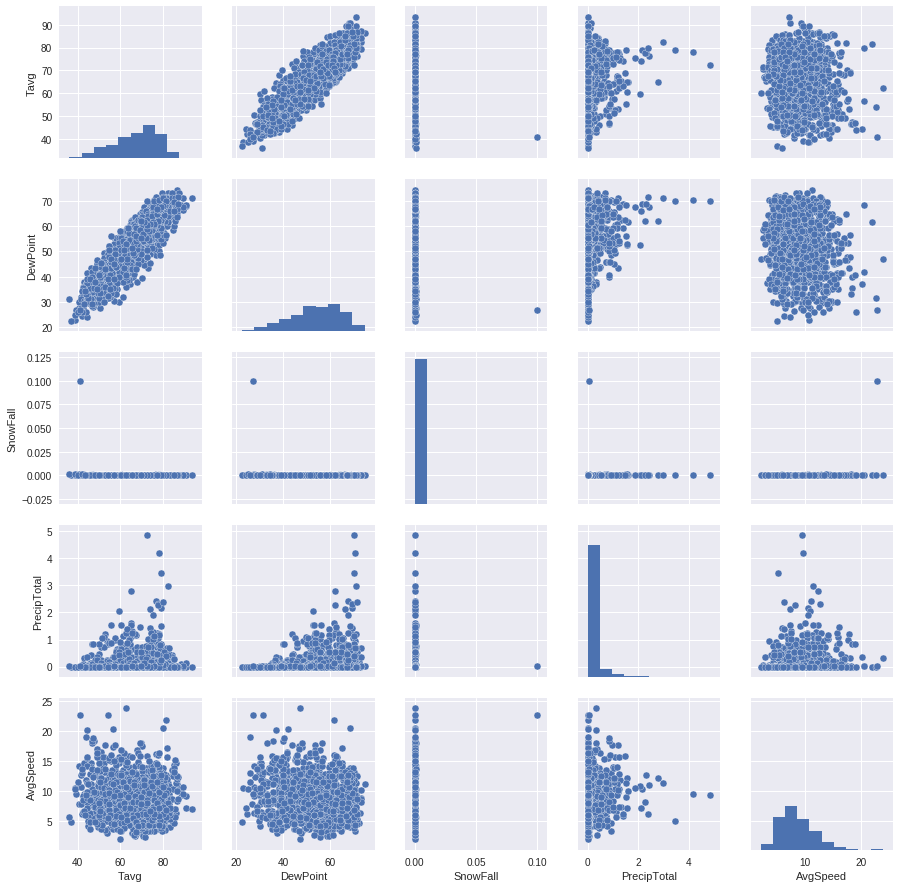

In [13]:
sns.pairplot(df);

#### `Tavg` and `DewPoint` are highly correlated!

##### According to [this website](http://andrew.rsmas.miami.edu/bmcnoldy/Humidity.html), a way to calculate Relative Humidity from temperature and dew point:
RH = 100*(EXP((17.625*TD)/(243.04+TD))/EXP((17.625*T)/(243.04+T)))  
TD and T in Celcius  
  
##### [Wikipedia](https://en.wikipedia.org/wiki/Dew_point) gives a simpler approximation:
RH = 100 - (Tavg - DewPoint) * (25/9)  
Tavg and DewPoint in Fahrenheit

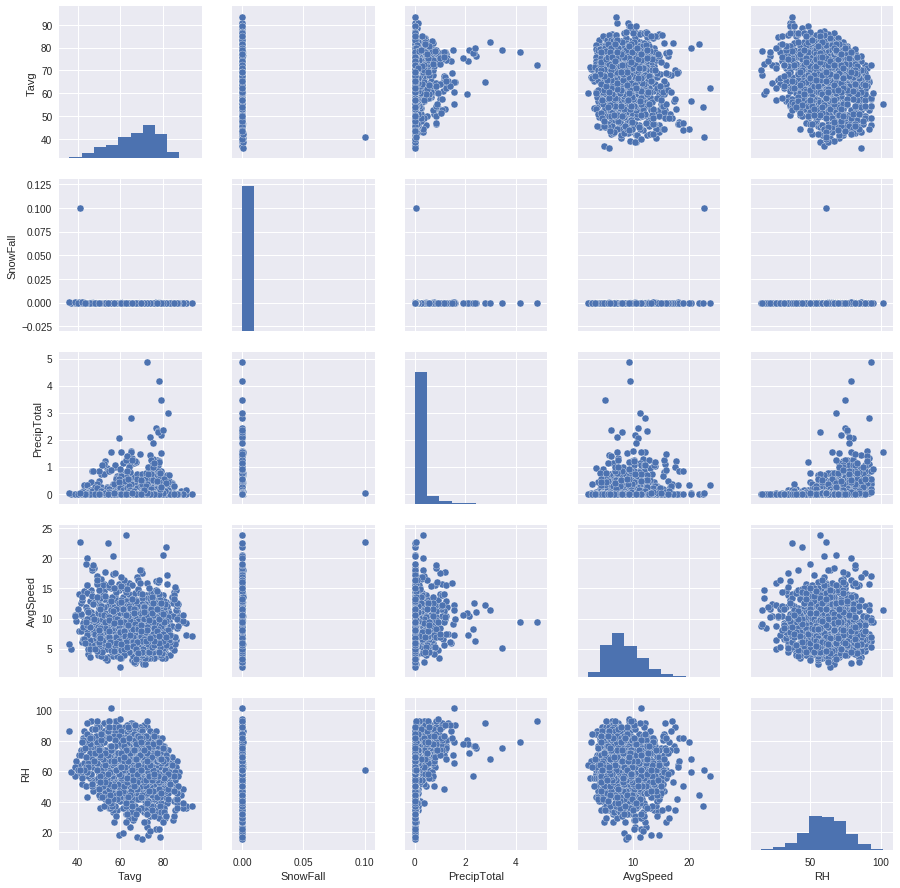

In [14]:
# calculate Relative Humidity from Temperature and Dew Point
df['RH'] = 100 - (df.Tavg - df.DewPoint) * (25/9)

df.drop('DewPoint', axis=1, inplace=True)
sns.pairplot(df);

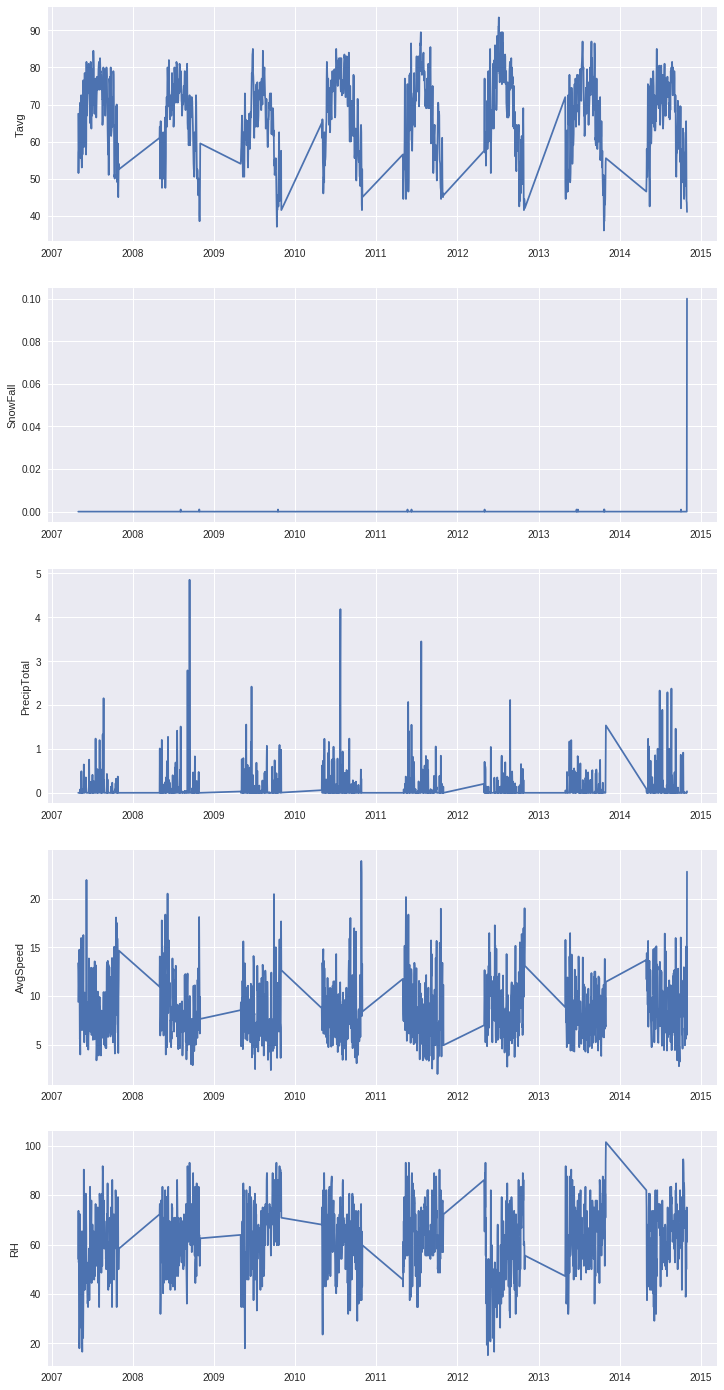

In [15]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(12, 25))
for index, col in enumerate(df.columns):
    ax = axes[index]
    ax.plot(df[col]);
    ax.set_ylabel(col);

#### Note: May want to drop `SnowFall` in the future.

In [16]:
df.to_csv('assets/weather_cleaned.csv')